# LOGISTIC REGRESSION IMPLEMENATION ON MINIST AND IRIS DATASET 

This code showcases the implementation of logistic regression on two datasets: Iris and MNIST.Confusion matrices are displayed using heatmaps.
Metrics such as accuracy, precision, recall, and F1-score are printed for each label in the multiclass scenario.
This code provides a comprehensive analysis of logistic regression performance on the given datasets, including various metrics and visualizations for a thorough understanding of the models

# LOGISTIC REGRESSION ON IRIS DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
import sklearn.linear_model as sklm
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("Iris.csv")
x = data.drop("Species",axis=1)
y = data["Species"]

In [3]:
x_train,x_test,y_train,y_test = skm.train_test_split(x,y,test_size=0.3)
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((105, 5), (45, 5), (105,), (45,))

In [4]:
ssc = StandardScaler()
x_train = ssc.fit_transform(x_train)
x_test = ssc.transform(x_test)

In [5]:
reg = sklm.LogisticRegression()
reg.fit(x_train,y_train)
print(f"THE SCORE OF THE LOGISTIC REGRESSION MODEL :",reg.score(x_test,y_test))

THE SCORE OF THE LOGISTIC REGRESSION MODEL : 1.0


In [6]:
y_pred_reg= reg.predict(x_test)

In [7]:
a=(np.mean(y_pred_reg== np.array(y_test)))*100
print(f"ACCURACY OF THE LOGISTIC REGRESSION MODEL :",a)

ACCURACY OF THE LOGISTIC REGRESSION MODEL : 100.0


In [8]:
c=pd.crosstab(y_pred_reg,y_test)
c

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,12,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,0,21


[Text(0.5, 28.5, 'ACTUAL VALUES'),
 Text(28.5, 0.5, 'PREDICTED VALUES '),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

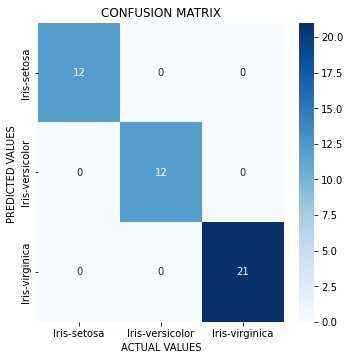

In [9]:
fig=plt.figure(figsize=(5.5,5.5))
a=sn.heatmap(c,annot=True,cmap='Blues')
a.set(xlabel ="ACTUAL VALUES", ylabel = "PREDICTED VALUES ", title ='CONFUSION MATRIX')

In [10]:
for i in range(c.shape[0]):
    TP=c.iloc[i,i]
    FP=c.iloc[i,:].sum()-TP
    FN=c.iloc[:,i].sum()-TP
    TN=c.sum().sum()-TP-FP-FN
    Accuracy=(TP+TN)/c.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_Score=(2*Precision*Recall)/(Precision+Recall)
    print(f"LABEL:",c.index[i],f"Accuracy:",Accuracy,f"Precision:",Precision,f"Recall",Recall,f"F1_Score",F1_Score)

LABEL: Iris-setosa Accuracy: 1.0 Precision: 1.0 Recall 1.0 F1_Score 1.0
LABEL: Iris-versicolor Accuracy: 1.0 Precision: 1.0 Recall 1.0 F1_Score 1.0
LABEL: Iris-virginica Accuracy: 1.0 Precision: 1.0 Recall 1.0 F1_Score 1.0


# LOGISTIC REGRESSION ON MNIST DATASET

In [11]:
df=pd.read_csv("mnist_train.csv")
dt= pd.read_csv("mnist_test.csv")
x1_train=df.drop("label",axis=1)
y1_train=df["label"]
x1_test=dt.drop("label",axis=1)
y1_test=dt["label"]

In [12]:
x1_train.shape, x1_test.shape, y1_train.shape,y1_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [13]:
ssc1 = StandardScaler()
x1_train = ssc1.fit_transform(x1_train)
x1_test = ssc1.transform(x1_test)

In [14]:
regr = sklm.LogisticRegression()
regr.fit(x1_train,y1_train)
print(f"THE SCORE OF THE LOGISTIC REGRESSION MODEL :",regr.score(x1_test,y1_test))

THE SCORE OF THE LOGISTIC REGRESSION MODEL : 0.9246


C:\Users\najaf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
y1_pred_reg= regr.predict(x1_test)

In [16]:
a1=(np.mean(y1_pred_reg== np.array(y1_test)))*100
print(f"ACCURACY OF THE LOGISTIC REGRESSION MODEL :",a1)

ACCURACY OF THE LOGISTIC REGRESSION MODEL : 92.46


In [17]:
c1=pd.crosstab(y1_pred_reg,y1_test)
c1

label,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,953,0,10,3,1,9,8,2,9,6
1,0,1111,11,1,3,6,4,9,10,7
2,2,6,918,19,9,3,7,22,4,3
3,2,2,19,925,2,32,4,7,23,8
4,2,0,10,3,914,9,4,5,7,19
5,11,1,5,22,1,776,16,2,24,7
6,6,3,12,2,8,14,911,0,8,0
7,2,1,8,10,6,8,1,947,11,24
8,2,11,35,18,7,31,3,3,865,9


[Text(0.5, 163.5, 'ACTUAL VALUES'),
 Text(163.5, 0.5, 'PREDICTED VALUES '),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

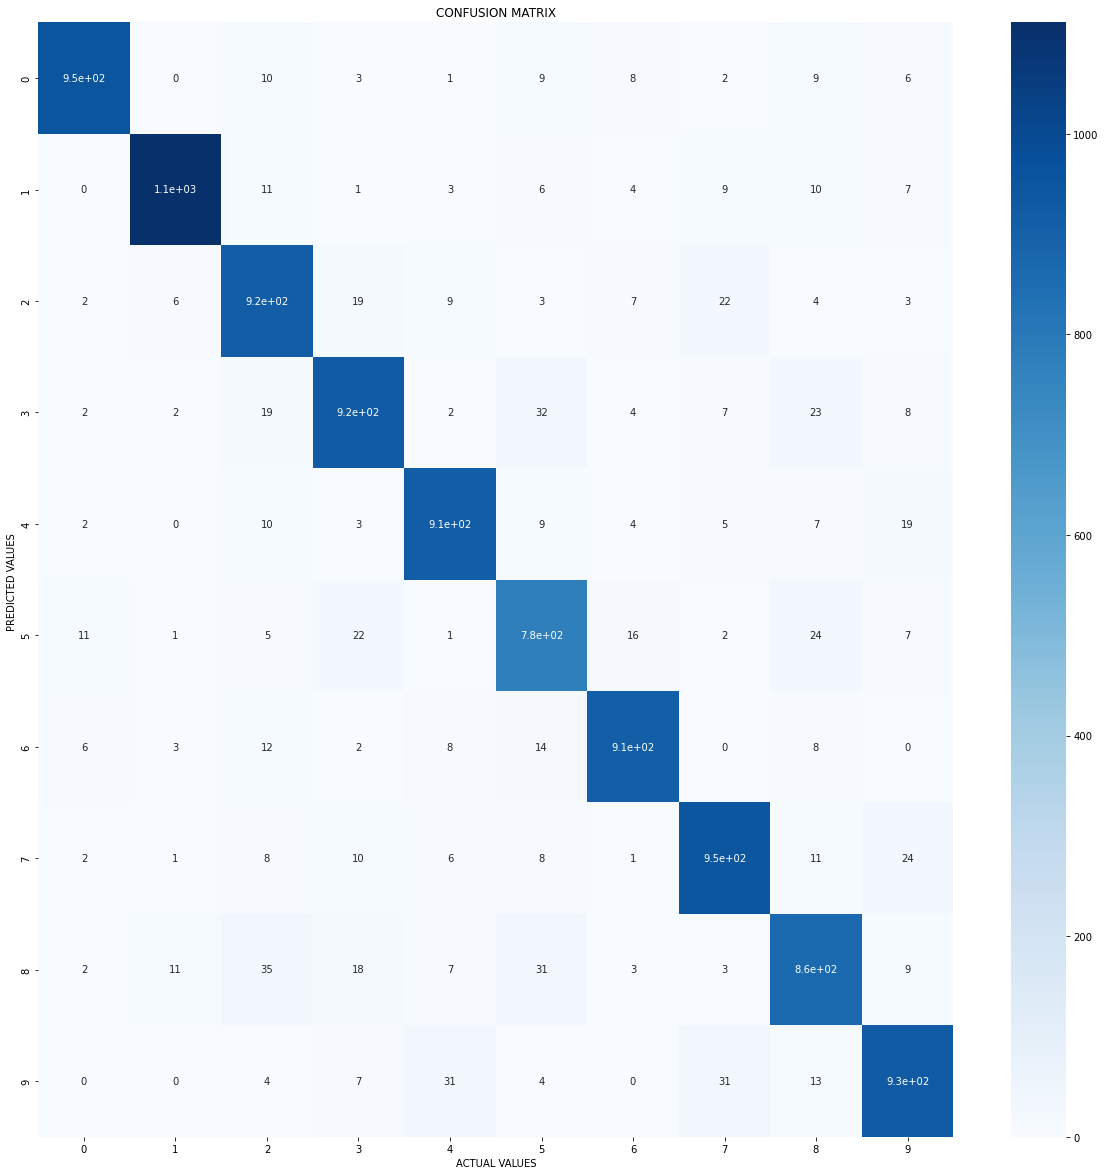

In [18]:
fig=plt.figure(figsize=(20.5,20.5))
a=sn.heatmap(c1,annot=True,cmap='Blues')
a.set(xlabel ="ACTUAL VALUES", ylabel = "PREDICTED VALUES ", title ='CONFUSION MATRIX')

In [19]:
for i in range(c1.shape[0]):
    TP=c1.iloc[i,i]
    FP=c1.iloc[i,:].sum()-TP
    FN=c1.iloc[:,i].sum()-TP
    TN=c1.sum().sum()-TP-FP-FN
    Accuracy=(TP+TN)/c1.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_Score=(2*Precision*Recall)/(Precision+Recall)
    print(f"LABEL:",c1.index[i],f"Accuracy:",Accuracy,f"Precision:",Precision,f"Recall",Recall,f"F1_Score",F1_Score)

LABEL: 0 Accuracy: 0.9925 Precision: 0.952047952047952 Recall 0.9724489795918367 F1_Score 0.9621403331650681
LABEL: 1 Accuracy: 0.9925 Precision: 0.9561101549053356 Recall 0.9788546255506608 F1_Score 0.9673487157161514
LABEL: 2 Accuracy: 0.9811 Precision: 0.9244712990936556 Recall 0.8895348837209303 F1_Score 0.9066666666666667
LABEL: 3 Accuracy: 0.9816 Precision: 0.9033203125 Recall 0.9158415841584159 F1_Score 0.9095378564405113
LABEL: 4 Accuracy: 0.9873 Precision: 0.9393627954779034 Recall 0.9307535641547862 F1_Score 0.9350383631713556
LABEL: 5 Accuracy: 0.9795 Precision: 0.8971098265895954 Recall 0.8699551569506726 F1_Score 0.8833238474672738
LABEL: 6 Accuracy: 0.99 Precision: 0.9450207468879668 Recall 0.9509394572025052 F1_Score 0.9479708636836628
LABEL: 7 Accuracy: 0.9848 Precision: 0.9302554027504911 Recall 0.9212062256809338 F1_Score 0.9257086999022482
LABEL: 8 Accuracy: 0.9772 Precision: 0.8790650406504065 Recall 0.8880903490759754 F1_Score 0.8835546475995913
LABEL: 9 Accuracy: 